In [6]:
import numpy as np
import pandas as pd
import material as ml
import thinfilm as tm
import matplotlib.pyplot as plt
from scipy.optimize import differential_evolution, minimize

x = 1
file = pd.read_csv('./spectrum/SiO2glass.csv')
R_SiO2 = file['SiO2H'].values[x:-x]
R_sub = file['glass'].values[x:-x]

sub =  pd.read_csv('./spectrum/TEO/sodalime.csv')
soda_n = sub['n'].values
soda_k = sub['k'].values
w = sub['nm'].values

SiO2_1 = pd.read_csv('./spectrum/TEO/SiO2_1.csv')
SiO21n = SiO2_1['n'].values
SiO21k = SiO2_1['k'].values
SiO2_TEO = ml.Material(w, SiO21n, SiO21k, w)

sodalime_Nanya_TEO = ml.Material(w, soda_n, soda_k, w)
void = ml.Non_Dispersion(1)
wl = np.linspace(400,700,301)[x:-x]

SiO2 = lambda th: ml.Cauchy([th[0], th[1]])

hypo = lambda th: tm.Design(
    [void, SiO2_TEO, sodalime_Nanya_TEO],
    [None, th[0], None]
).reflectance(wl, 5)

sim_sub = tm.Design(
    [void, sodalime_Nanya_TEO],
    [None, None]
).reflectance(wl, 5)

fom = lambda th: tm.RMSE(100*hypo(th), R_SiO2)

In [30]:
sol = differential_evolution(fom, [(24,100)])
print(sol.x)

[39.37914869]


0.09168732756924233


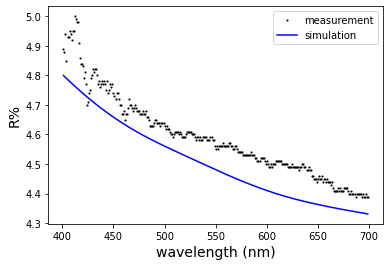

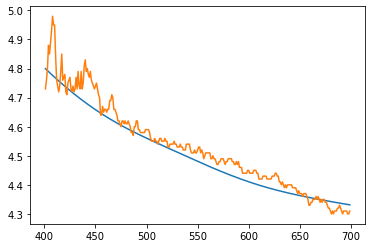

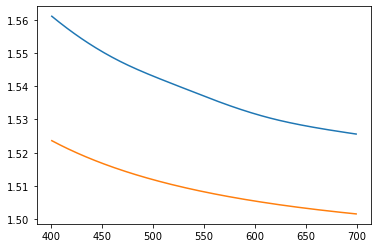

In [14]:
plt.plot(wl, R_SiO2, 'ks', markersize = 1, label = 'measurement')
plt.plot(wl, 100*hypo([0]), '-b', label = 'simulation')
plt.legend(loc = 'best')
plt.xlabel('wavelength (nm)', fontsize = 14)
plt.ylabel('R%', fontsize = 14)
print(tm.RMSE(R_SiO2,100*hypo([0]) ))
#plt.savefig('SiO2.png')
plt.show()
plt.plot(wl, 100*sim_sub)
plt.plot(wl, R_sub)
plt.show()
plt.plot(wl, sodalime_Nanya_TEO.nvalues(wl))
#plt.plot(wl, SiO2([1.34773057,0.03,25.96971971]).nvalues(wl))
plt.plot(wl, SiO2_TEO.nvalues(wl))
plt.show()